# <div style="text-align: center; color: cyan">Fine-tuning</div>

## <div style="text-align: center; color: lime">Setup</div>

In [1]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
    !git clone https://github.com/LiterallyTheOne/Pytorch_Tutorial.git

    %cd src / 10_fine_tuning


## <div style="text-align: center; color: lime">Imports</div>

In [9]:
from pathlib import Path
import kagglehub

import torch
from torch import nn
from torch.utils.data import DataLoader, random_split

from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

from matplotlib import pyplot as plt

## <div style="text-align: center; color: lime">Load a dataset from Kaggle</div>

In [2]:
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")
path = Path(path) / "tom_and_jerry/tom_and_jerry"

tom_and_jerry_transforms = transforms.Compose([transforms.Resize([90, 160]), transforms.ToTensor()])

all_data = ImageFolder(path, transform=tom_and_jerry_transforms)

g1 = torch.Generator().manual_seed(20)
train_data, val_data, test_data = random_split(all_data, [0.7, 0.2, 0.1], g1)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

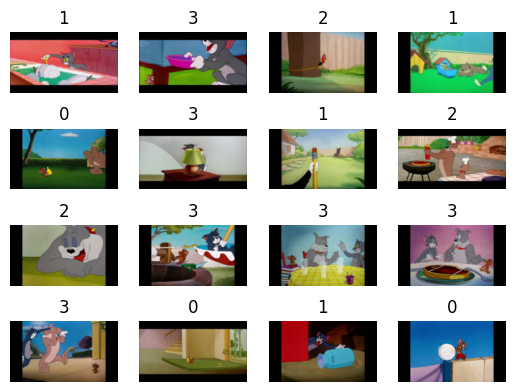

In [13]:
images, labels = next(iter(train_loader))

fig, axes = plt.subplots(4, 4)

axes_ravel = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes_ravel[i].imshow(transforms.ToPILImage()(image))
    axes_ravel[i].set_title(label.item())
    axes_ravel[i].set_axis_off()

## <div style="text-align: center; color: lime">Load pretrained a pretrained model</div>

In [12]:
model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1)
print(model)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

<div style="text-align: center">

<div>
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</div>

<a style="margin: 1em" href="https://literallytheone.github.io">
https://literallytheone.github.io
</a>

</div>
